In [23]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import math
import re
from collections import Counter
import seaborn as sns
import scipy

In [2]:
path1 = r'E:\netData\MAGzip\MAG Nobel\2 Nobelpapers\1M NobelCitingpapers.zip'
path2 = r'E:\netData\MAGzip\MAG Nobel\2 Nobelpapers\712 Nobelpapers.zip'
path3 = r'E:\netData\MAGzip\MAG Nobel\2 Nobelpapers\712 NobelpapersCD.zip'

In [9]:
f1 = pd.read_csv(path1)
f2 = pd.read_csv(path2)
f3 = pd.read_csv(path3)

In [12]:
f1['Field'] = f1['Nobel'].map(f2.set_index('paperid')['Field'])
def get_len(x):
    if type(x)!=float:
        return len(x)
    else:
        return 1
f1['length'] = f1['title'].apply(get_len)
f11 = f1[f1['Field'] == 'Physics']
f12 = f1[f1['Field'] == 'Chemistry']
f13 = f1[f1['Field'] == 'Medicine']

# title length

In [25]:
x_pos = [1,2,]
colors = ["#1F618D","#AF601A"]
labels = ['Physics','Chemistry','Medicine']
d1 = f11.loc[f11['type'] == 'DC'  ,  'length']
d2 = f12.loc[f12['type'] == 'DC'  ,  'length']
d3 = f13.loc[f13['type'] == 'DC'  ,  'length']
d5 = f11.loc[f11['type'] == 'CC'  ,  'length']
d6 = f12.loc[f12['type'] == 'CC'  ,  'length']
d7 = f13.loc[f13['type'] == 'CC'  ,  'length']
d = [np.mean(d1),np.mean(d2),np.mean(d3),np.mean(d5),np.mean(d6),np.mean(d7)]
std = [np.std(d1)*len(d1)**-0.5,np.std(d2)*len(d2)**-0.5,np.std(d3)*len(d3)**-0.5,np.std(d5)*len(d5)**-0.5,np.std(d6)*len(d6)**-0.5,np.std(d7)*len(d7)**-0.5]

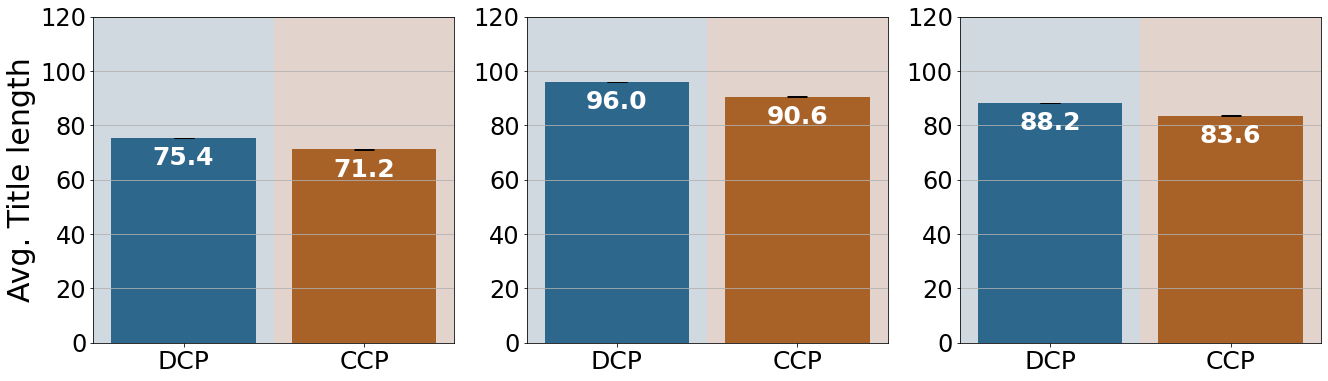

In [18]:
plt.subplots(1,3,figsize=(22,6))
for _ in range(3):
    ax = plt.subplot(1,3,_ + 1)
    dd = [d[_] , d[_+3]]
    plt.bar(x_pos, dd, yerr=[std[0],std[3]],align='center', color= colors,alpha=0.9,capsize=10)
    ax.yaxis.grid(True)
    plt.ylim((0,120))
    plt.xlim(0.5,2.5)
    for i in range(len(dd)):
        plt.text(x_pos[i],dd[i]-10, str(np.round(dd[i] , 1)),fontsize = 25,c = 'white', ha='center', fontweight='bold')
    plt.xticks(x_pos,['DCP','CCP'],fontsize = 25)
    plt.yticks(size = 24)
    if _ == 0:
        plt.ylabel(r'Avg. Title length',fontsize = 30)
    else:
        plt.ylabel(r'',fontsize = 0)
#     plt.title(labels[_],size = 35)
    ax.axvspan(min(x_pos)-1, max(x_pos) / 2+0.5, facecolor='#154360', alpha=0.2)
    ax.axvspan(max(x_pos) / 2+0.5, max(x_pos)+1, facecolor='#6E2C00', alpha=0.2)

In [26]:
print(scipy.stats.mannwhitneyu(d1 , d5, alternative='two-sided'))
print(scipy.stats.mannwhitneyu(d2 , d6, alternative='two-sided'))
print(scipy.stats.mannwhitneyu(d3 , d7, alternative='two-sided'))

MannwhitneyuResult(statistic=4829972633.5, pvalue=2.8663153979107922e-114)
MannwhitneyuResult(statistic=11810660716.5, pvalue=1.4768447080475352e-279)
MannwhitneyuResult(statistic=15311432066.5, pvalue=1.8570963657387138e-264)


# match

In [19]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter

In [20]:
stopwordlst = set(stopwords.words('english'))
additional_stop_words = ['der','zur','und','I','ii','l']
stopwordlst.update(additional_stop_words)

lemmatizer = WordNetLemmatizer()

def get_verbs_list(f):
    verbs_list = []
    for i in f['title'].values:
        if type(i) != float:
            for j in i.split():
                if j not in stopwordlst:
                    pos_tag = nltk.pos_tag([j])[0][1]  # Get the Part-of-Speech tag
                    if pos_tag.startswith('V'):  # Check if the word is a verb
                        lemmatized_verb = lemmatizer.lemmatize(j, 'v')  # Lemmatize the verb
                        if lemmatized_verb not in stopwordlst:
                            verbs_list.append(lemmatized_verb)
    return verbs_list

In [21]:
def get_nones_list(f):
    verbs_list = []
    for i in f['title'].values:
        if type(i) != float:
            for j in i.split():
                if j not in stopwordlst:
                    pos_tag = nltk.pos_tag([j])[0][1]  # Get the Part-of-Speech tag
                    if pos_tag.startswith('N'):  # Check if the word is a verb
                        lemmatized_verb = lemmatizer.lemmatize(j, 'n')  # Lemmatize the verb
                        if lemmatized_verb not in stopwordlst:
                            verbs_list.append(lemmatized_verb)
    return verbs_list

# verbs

In [27]:
df11 = f11[f11['type'] == 'DC']
df21 = f12[f12['type'] == 'DC']
df31 = f13[f13['type'] == 'DC']
df12 = f11[f11['type'] == 'CC']
df22 = f12[f12['type'] == 'CC']
df32 = f13[f13['type'] == 'CC']

f1 = pd.concat([df11 , df21 , df31])
f2 = pd.concat([df12 , df22 , df32])

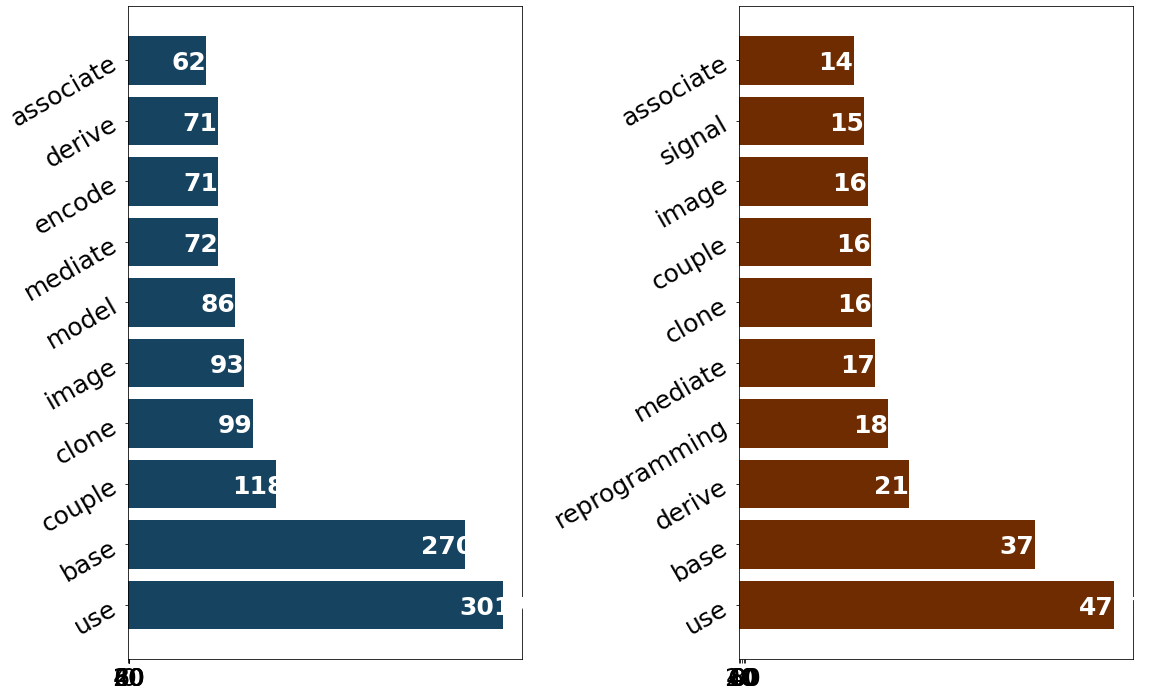

In [28]:
plt.subplots(1,2,figsize=(18,12))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.55,hspace=0.2)

flst = [f1,f2]
y_pos = range(1,11)
colors = ["#1F618D","#AF601A"]
for j in range(2):
    d = pd.DataFrame(Counter(get_verbs_list(flst[j])).most_common(10))
    ax = plt.subplot(1,2,j+1)
    x = d[1].values
    plt.barh(y_pos , x ,align='center',color=colors[j],alpha=1 )
    plt.xticks(size = 25)
    plt.yticks(y_pos ,d[0].values ,size = 25)
    for _ in range(len(x)):
        text = x[_]
        plt.text(text-5,y_pos[_]*0.75 , str(np.round(text , 3)),fontsize = 25,c = 'white', ha='center', fontweight='bold')
    ax.tick_params(axis='y', which='major', labelrotation=30)

# Nouns

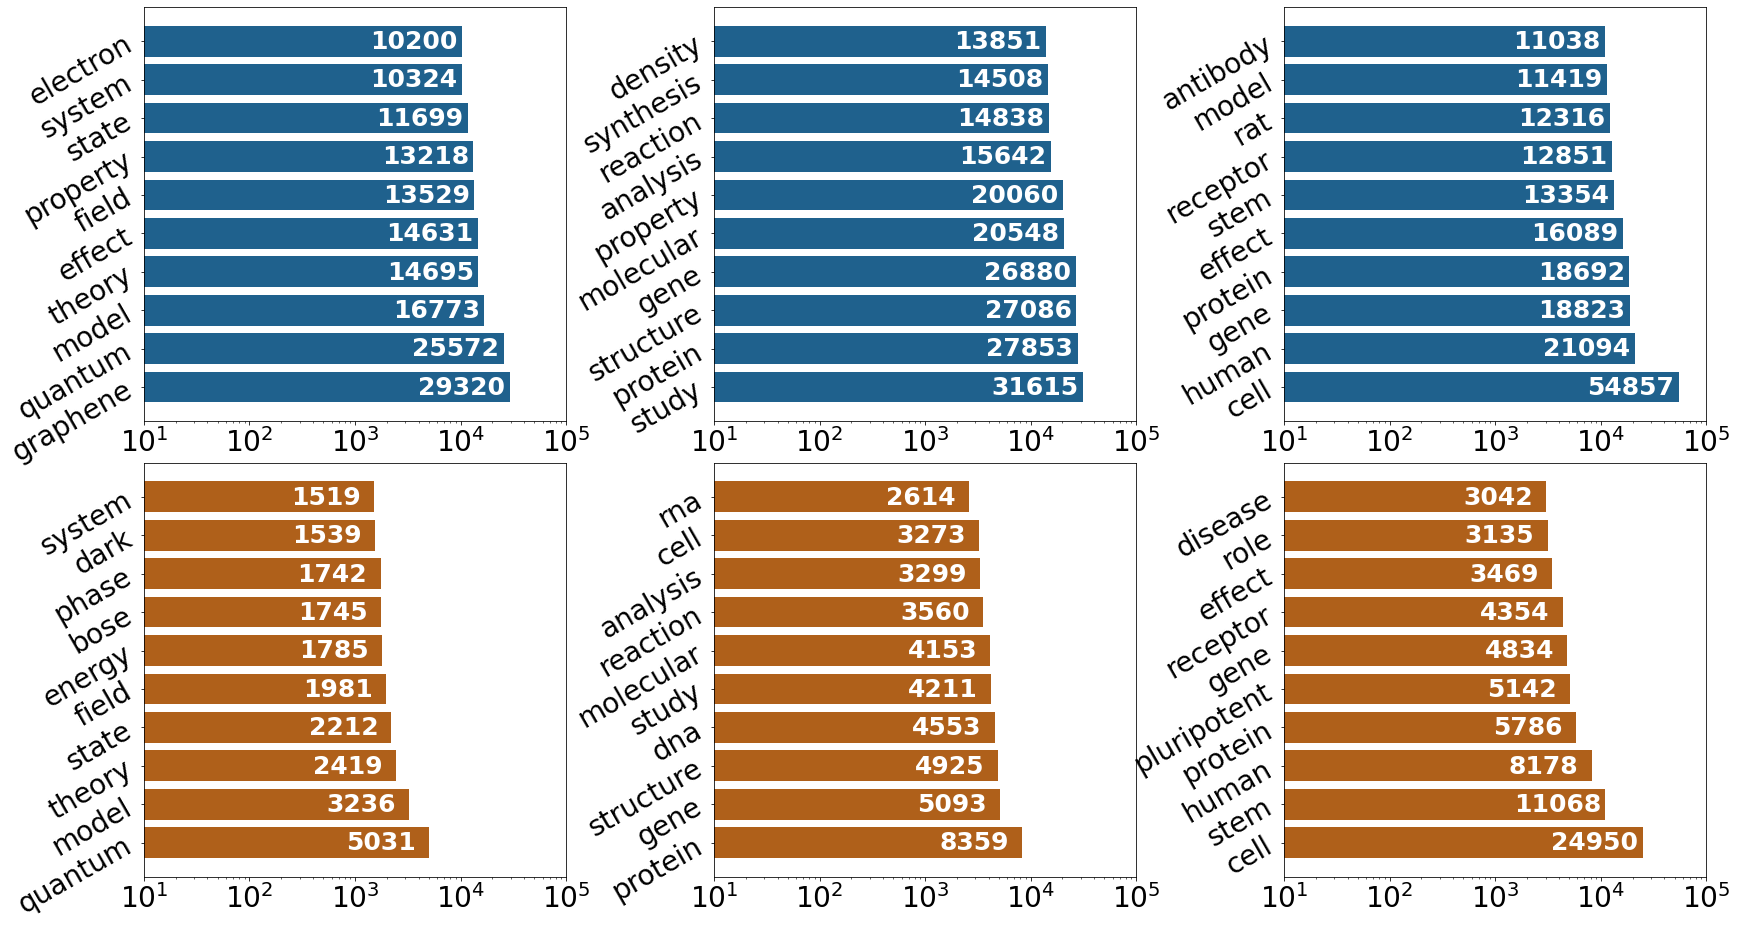

In [35]:
plt.subplots(2,3,figsize=(28,16))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.35,hspace=0.1)

flst = [df11 , df21 , df31 , df12 , df22 , df32]
y_pos = range(1,11)
colors = ["#1F618D","#AF601A"]
for j in range(6):
    if j < 3:
        k = 0
    else:
        k = 1
    d = pd.DataFrame(Counter(get_nones_list(flst[j])).most_common(10))
    ax = plt.subplot(2,3,j+1)
    x = d[1].values
    ax.set_xscale("log")
    plt.barh(y_pos , x ,align='center',color=colors[k],alpha=1 )
    plt.xticks([10,100,1000,10000,100000],size = 28)
    plt.yticks(y_pos ,d[0].values ,size = 28)
    for _ in range(len(x)):
        text = x[_]
        plt.text(text*0.35,y_pos[_]-0.2 , str(np.round(text , 3)),fontsize = 25,c = 'white', ha='center', fontweight='bold')
    ax.tick_params(axis='y', which='major', labelrotation=30)